# SNN_0

This code is designed to demo the use of a Spiking Neural Network to propogate spikes between neurons. At this stage there is no learning involved, it's purely about propogating spikes between LIF neurons.

More biologically plausible neurons and learning will be introduced later.

### Set up the environment

In [1]:
import numpy as np
from mnist import MNIST   
import cv2
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
duration = 50        # Length of each time period (ms)

### Utility functions

In [3]:
def plot_neuron_behaviour(time, data, neuron_type, neuron_id, y_title):
    #print ('Drawing graph with time.shape={}, data.shape={}'.format(time.shape, data.shape))
    plt.plot(time,data)
    plt.title('{} @ {}'.format(neuron_type, neuron_id))
    plt.ylabel(y_title)
    plt.xlabel('Time (msec)')
    plt.ylim([0,2])
    plt.show()

In [4]:
def plot_membrane_potential(time, Vm, neuron_type, neuron_id = 0):
    plot_neuron_behaviour(time, Vm, neuron_type, neuron_id, y_title = 'Membrane potential (V)')

def plot_spikes(time, Vm, neuron_type, neuron_id = 0):
    plot_neuron_behaviour(time, Vm, neuron_type, neuron_id, y_title = 'Spike (V)')

### Create a basic neuron class

Use LIF neuron for now, this can be made more complex over time.

Based on http://neurdon.wpengine.com/2011/01/19/neural-modeling-with-python-part-1/

In [67]:
class Neuron():
    def __init__(self):
        # Simulation config (may not all be needed!!)
        self.dt       = 0.125       # simulation time step
        self.t_rest   = 0           # initial refractory time
        
        #LIF Properties 
        self.Vm       = [0]               # Initial potential (mV)
        self.output   = 0                # Neuron output
        self.t        = 0                # Neuron time step
        self.Rm       = 1                # Resistance (kOhm)
        self.Cm       = 10               # Capacitance (uF) 
        self.tau_m    = self.Rm * self.Cm # Time constant
        self.tau_ref  = 4                # refractory period (ms)
        self.Vth      = 0.75             # = 1  #spike threshold
        self.V_spike  = 0.5              # spike delta (V)
        self.time     = [0]               # Time duration for the neuron (needed?)
        self.spikes   = [0]               # Output (spikes) for the neuron
        self.type     = 'Leaky Integrate and Fire'
        self.debug    = True
        if self.debug:
            print ('Neuron(): Created {} neuron starting at time {}'.format(self.type, self.t))
    
    def spike_generator(self, neuron_input):
        duration = len(neuron_input)
        if self.debug:
            print ('spike_generator(): Running time period self.t={}, self.t+duration={}'
                   .format(self.t, self.t+duration))
        #_Vm = self.Vm[len(self.Vm)-1]   # Get most recent Vm from self.Vm
        if self.debug:
            print ('Neuron.spike_generator.initial_state(input={}, duration={}, Vm={}, t={})'
               .format(neuron_input, duration, self.Vm, self.t))
        i = len(self.Vm)-1       # Get index of most recent 
        for _i in range(duration):
            t = self.t   # Hacky!! 
            if t > self.t_rest:
                Vm=Vm[i-1] + (-Vm[i-1] + neuron_input[i-1]*self.Rm) / self.tau_m * self.dt
                self.Vm.append(Vm)
                if self.debug:
                    print('spike_generator(): i={}, t={}, Vm[i-1]={}, neuron_input={}, self.Rm={}, self.tau_m * self.dt = {}'
                          .format(i,t, self.Vm[i-1], neuron_input[i-1], self.Rm, self.tau_m * self.dt))
                if Vm >= self.Vth:
                    #Vm[i] += self.V_spike
                    self.spikes.append(1)      #[i] = 1
                    self.t_rest = t + self.tau_ref
                    if self.debug:
                        print ('*** Neuron.spike_generator.spike=(self.t_rest={}, t={}, self.tau_ref={})'
                           .format(self.t_rest, t, self.tau_ref))
                else:
                    self.spikes.append(0)
            i += 1     # Increment index

        if self.debug:
            print ('Neuron.spike_generator.exit_state(Vm={} at iteration i={}, time={})'
                   .format(self.Vm, i, self.t))
        #return time, Vm, output

* Assume a consistent/single input value for now

In [68]:
T         = 20    # total time to sumulate (msec)
dt        = 0.0125 # Simulation timestep
time      = int(T / dt)
inpt      = 0.9   # Neuron input voltage
neuron_input=np.full((time),inpt)

### Create an array of neurons

For now, create 2 layers with 10 neurons in each layer

In [69]:
neurons = []
for rows in range(2):
    n = []
    for count in range(10):
        n.append(Neuron())
    neurons.append(n)
    

Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate and Fire neuron starting at time 0
Neuron(): Created Leaky Integrate 

* Run stimuli for each neurons in layer 0. Assume the same stimuli for now

In [70]:
print (len(neuron_input))
neurons[0][0].spike_generator(neuron_input)

1600
spike_generator(): Running time period self.t=0, self.t+duration=1600
Neuron.spike_generator.initial_state(input=[ 0.9  0.9  0.9 ...,  0.9  0.9  0.9], duration=1600, Vm=[0], t=0)
Neuron.spike_generator.exit_state(Vm=[0] at iteration i=1600, time=0)


In [74]:
print (neurons[0][0].Vm)

[0]


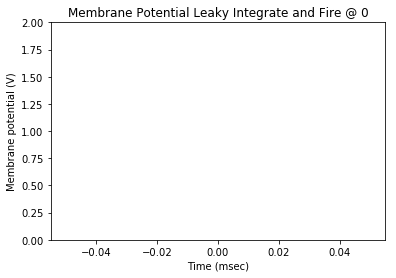

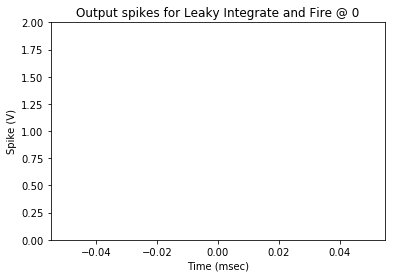

In [75]:
neuron0 = neurons[0][0]
plot_membrane_potential(neuron0.time, neuron0.Vm, 'Membrane Potential {}'.format(neuron0.type), neuron_id = "0")
plot_spikes(neuron0.time, neuron0.spikes, 'Output spikes for {}'.format(neuron0.type), neuron_id = "0")

In [26]:
neuron2 = Neuron()

Neuron(): Created Leaky Integrate and Fire neuron starting at time 0


In [27]:
#neuron2_time = np.zeros(len(neuron_time))
#print (neuron2_time.shape)
#neuron2_Vm = np.zeros(len(neuron_Vm))
#print (neuron2_Vm.shape)
#neuron2_output = np.zeros(len(neuron_output))
#print (neuron2_output.shape)

In [28]:
neuron2_input = neuron_output
#print (neuron2_input.shape)
#neuron2_time = np.zeros(len(neuron_time))
#neuron2_Vm = np.zeros(len(neuron_Vm))
#neuron2_output = np.zeros(len(neuron_output))

In [29]:
neuron2_time, neuron2_Vm, neuron2_output = neuron2.spike_generator(neuron2_input)   #[time_step], duration=0.25)
#neuron2_time = np.append(neuron2_time,t)
#neuron2_Vm = np.append(neuron2_Vm,v)
#neuron2_output = np.append(neuron2_output, o)

spike_generator(): Running time period self.t=0, self.t+duration=1601
Neuron.spike_generator.initial_state(input=[ 0.  0.  0. ...,  0.  0.  0.], duration=1601, Vm=0, t=0)
spike_generator(): i=1, t=0.125, Vm[i-1]=0.0, neuron_input=0.0, self.Rm=1, self.tau_m * self.dt = 0.625
spike_generator(): i=2, t=0.25, Vm[i-1]=0.0, neuron_input=0.0, self.Rm=1, self.tau_m * self.dt = 0.625
spike_generator(): i=3, t=0.375, Vm[i-1]=0.0, neuron_input=0.0, self.Rm=1, self.tau_m * self.dt = 0.625
spike_generator(): i=4, t=0.5, Vm[i-1]=0.0, neuron_input=0.0, self.Rm=1, self.tau_m * self.dt = 0.625
spike_generator(): i=5, t=0.625, Vm[i-1]=0.0, neuron_input=0.0, self.Rm=1, self.tau_m * self.dt = 0.625
spike_generator(): i=6, t=0.75, Vm[i-1]=0.0, neuron_input=0.0, self.Rm=1, self.tau_m * self.dt = 0.625
spike_generator(): i=7, t=0.875, Vm[i-1]=0.0, neuron_input=0.0, self.Rm=1, self.tau_m * self.dt = 0.625
spike_generator(): i=8, t=1.0, Vm[i-1]=0.0, neuron_input=0.0, self.Rm=1, self.tau_m * self.dt = 0.625
spi

In [30]:
start_time = 0
end_time = len(neuron_time)
print(start_time,end_time)

0 1601


In [31]:
print (neuron2_time.shape)
print (neuron2_time)

(1601,)
[   0    1    2 ..., 1598 1599 1600]


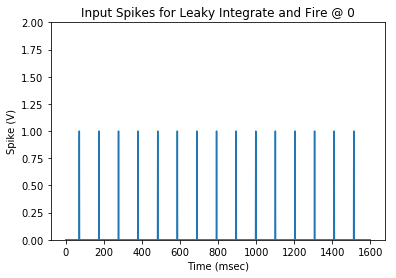

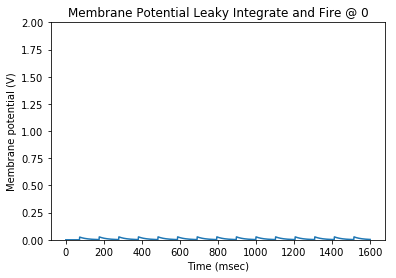

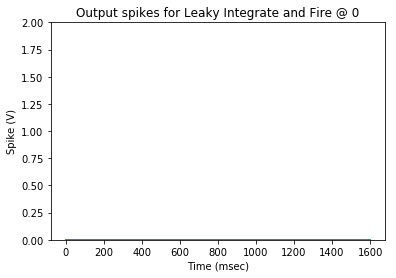

In [32]:
plot_spikes(neuron_time[start_time:end_time], neuron_output[start_time:end_time], 
            'Input Spikes for {}'.format(neuron2.type), neuron_id = "0")
plot_membrane_potential(neuron2_time[start_time:end_time], neuron2_Vm[start_time:end_time], 
            'Membrane Potential {}'.format(neuron2.type), neuron_id = "0")
plot_spikes(neuron2_time[start_time:end_time], neuron2_output[start_time:end_time], 
            'Output spikes for {}'.format(neuron2.type), neuron_id = "0")